<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/Support%20Vector%20Machines/support_vector_machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines


https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

In [0]:
%matplotlib inline
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from scipy import stats


## 1. Algorithm

The goal of support vector machines is to find the line that maximizes the minimum distance to the line.

**SVM Decision Boundary:**

> ${\displaystyle\min_{\theta}\frac{1}{2}\sum_{j=1}^n\theta_j^2=\displaystyle\frac{1}{2}(\theta_1^2+\theta_2^2+...)}=\displaystyle\frac{1}{2}(\sqrt{\theta_1^2+\theta_2^2+...})^2 = \frac{1}{2}||\theta||^2$ 

> $s.t. \quad\theta^Tx^{(i)}\geqslant1 \quad \textrm{if} \quad y^{(i)}=1$

>$ \quad\quad\quad\theta^Tx^{(i)}\leqslant1 \quad \textrm{if} \quad y^{(i)}=0$

**Gaussian Kernel Function:**

>$ f_i=similarity(x, l^{(i)}) = e ^{-\displaystyle\frac{||x - l^{(i)} ||^2 }{2\sigma^2}} $

## 2. Linear Kernel

In [0]:
# importing scikit learn with make_blobs 
from sklearn.datasets.samples_generator import make_blobs 
  
# creating datasets X containing n_samples 
# Y containing two classes 
X, y = make_blobs(n_samples=500, centers=2, 
                  random_state=0, cluster_std=0.40) 


# plotting scatters  
#plt.figure(1, figsize=(8,6))
#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter'); 
#plt.show()  

In [4]:
from sklearn.svm import SVC # "Support vector classifier"
svc = SVC(kernel='linear', C=1E10)
svc.fit(X, y)


SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

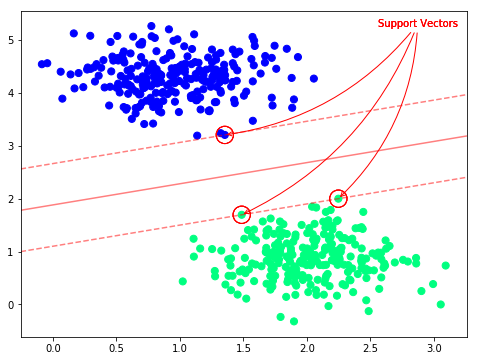

In [5]:
def plot_svc_decision_function(model, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 100)
    y = np.linspace(ylim[0], ylim[1], 100)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='r',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--']
              )
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

def plot_support_vectors(model): 
   
    for i in range(model.support_vectors_.shape[0]):
      plt.annotate('Support Vectors', xy=(model.support_vectors_[i]), color='r', textcoords='axes fraction',xytext=(.8, .95),
                  arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.2', color='r'),
                 )
      plt.scatter(model.support_vectors_[:, 0],
                 model.support_vectors_[:, 1],
                 s=300, edgecolors='r', facecolors='none');    
    
    
    
plt.figure(1, figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(svc);
plot_support_vectors(svc);
plt.show() 

## 2. Gaussian Kernel

In [0]:
from sklearn.datasets.samples_generator import make_circles
X_c, y_c = make_circles(300, factor=.2, noise=.1, random_state=0)

clf = SVC(kernel='rbf', gamma='auto', C=1E6).fit(X_c, y_c)

r = np.exp(-(X_c ** 2).sum(1))


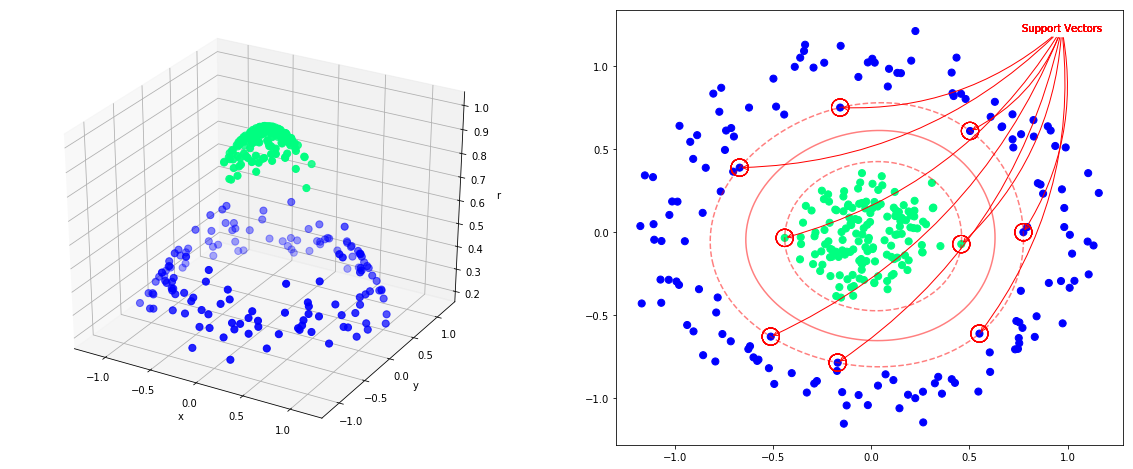

In [12]:
fig = plt.figure(figsize=(20, 8))
#fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.5)

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter3D(X_c[:, 0], X_c[:, 1], r, c=y_c, s=50, cmap='winter')
#ax.view_init(elev=elev, azim=azim)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')


plt.subplot(1, 2, 2)
plt.scatter(X_c[:, 0], X_c[:, 1], c=y_c, s=50, cmap='winter')
plot_svc_decision_function(clf);
plot_support_vectors(clf);

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  # Remove the CWD from sys.path while we load stuff.


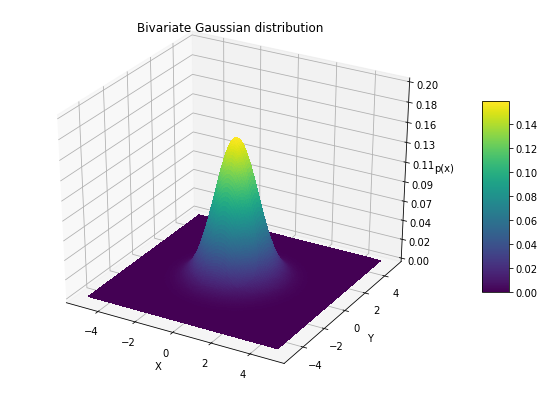

In [23]:
#import numpy as np
#from matplotlib import pyplot as plt

from matplotlib.mlab import bivariate_normal
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')
x = np.linspace(-5, 5, 200)
y = x
X,Y = np.meshgrid(x, y)
Z = bivariate_normal(X, Y)
surf = ax.plot_surface(X, Y, Z, rstride=1,
        cstride=1, cmap='viridis',
        linewidth=0, antialiased=False
    )

ax.set_zlim(0, 0.2)
ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('p(x)')

plt.title('Bivariate Gaussian distribution')
fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)

plt.show()

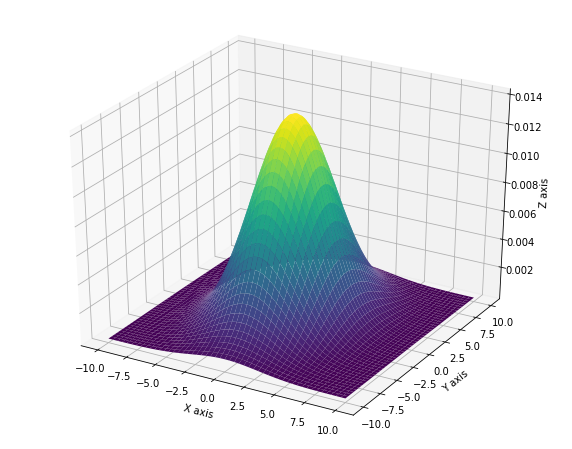

In [32]:
from scipy.stats import multivariate_normal

#Parameters to set
mu_x = 0
variance_x = 8

mu_y = 0
variance_y = 16

#Create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])

#Make a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')
ax.grid(True)
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=1)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()